In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv(r"/Users/apple/Documents/Python/Elevoo Internship/Customer Segmentation/Dataset/Mall_Customers.csv")
df.head()





,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Basic Data Info & Visualization
print("Shape of data:", df.shape)
print(df.describe())

Shape of data: (200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


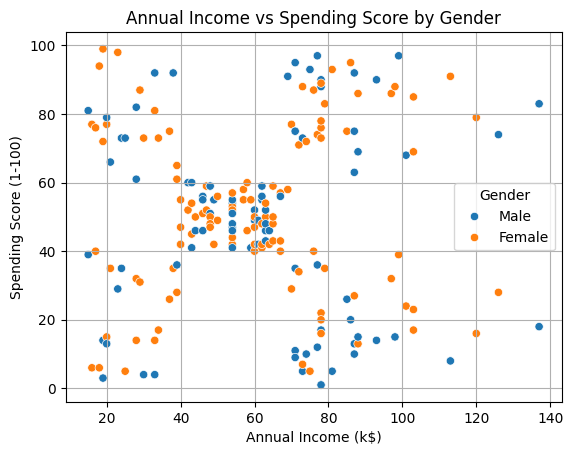

In [4]:
# Pairplot of Income vs Spending
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Annual Income vs Spending Score by Gender")
plt.grid(True)
plt.show()

In [ ]:

data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


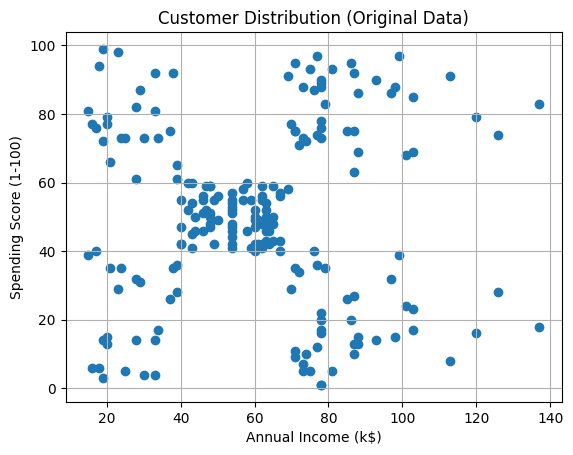

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



# original unscaled data
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.title('Customer Distribution (Original Data)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

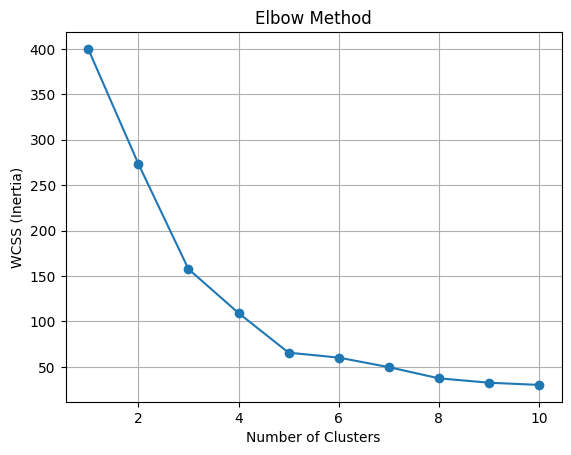

In [ ]:
# Optimal Number of Clusters using Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Elbow Plot
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()


In [ ]:
# Apply K-Means Clustering 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)


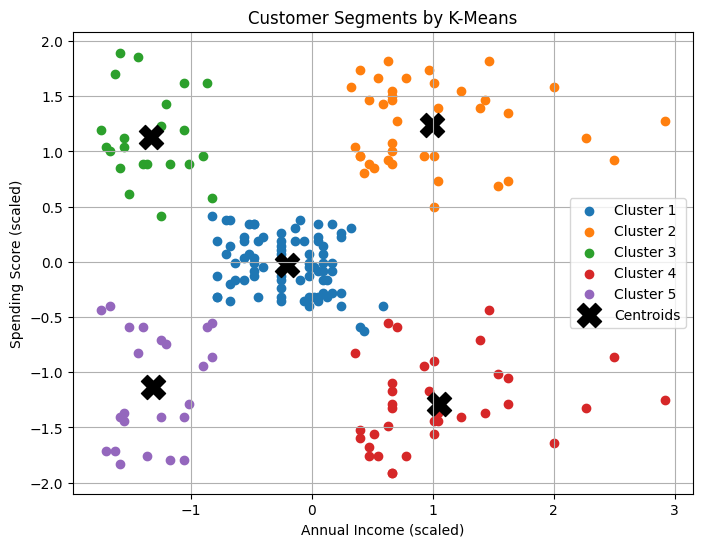

In [ ]:
# Visualize Clusters (2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[y_kmeans == 0, 0], scaled_data[y_kmeans == 0, 1], label='Cluster 1')
plt.scatter(scaled_data[y_kmeans == 1, 0], scaled_data[y_kmeans == 1, 1], label='Cluster 2')
plt.scatter(scaled_data[y_kmeans == 2, 0], scaled_data[y_kmeans == 2, 1], label='Cluster 3')
plt.scatter(scaled_data[y_kmeans == 3, 0], scaled_data[y_kmeans == 3, 1], label='Cluster 4')
plt.scatter(scaled_data[y_kmeans == 4, 0], scaled_data[y_kmeans == 4, 1], label='Cluster 5')

# Plotting Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', marker='X', label='Centroids')

plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()
